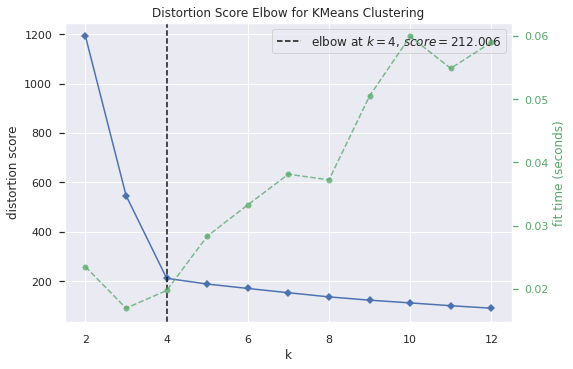

Accuracy score =  1.0
[[75  0  0  0]
 [ 0 75  0  0]
 [ 0  0 75  0]
 [ 0  0  0 75]]


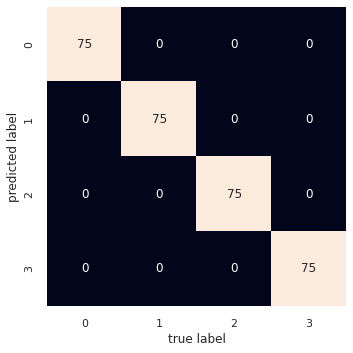

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode
import seaborn as sns; sns.set()

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

model = KMeans()
vis = KElbowVisualizer(model, k=12)
vis.fit(X)
vis.show()

kModel = KMeans(n_clusters = vis.elbow_value_)
y_predict = kModel.fit_predict(X)
labels = np.zeros_like(y_predict)
for i in range(4):
    mask = (y_predict == i)
    labels[mask] = mode(y_true[mask])[0]
print("Accuracy score = ", accuracy_score(y_true, labels))


mat = confusion_matrix(y_true, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
print(mat.T)